<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/Desafio_RL_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Usina de Energia




Nesta atividade, vamos aplicar os conceitos de multicolinearidade e homocedasticidade em um contexto diferente: o setor de energia. Utilizaremos esse dataset de uma usina de energia para explorar como esses conceitos podem afetar os nossos modelos de regressão. Vamos lá!

Sua tarefa envolve conduzir as seguintes etapas:

Primeira etapa: Verifique a multicolinearidade utilizando o conceito de VIF. Se houver indícios de multicolinearidade entre as variáveis, tente pensar em quais medidas podem ser tomadas. Para isso você deverá construir um modelo de regressão linear assumindo que a coluna PE é a variável y.

Segunda etapa: Realize uma análise de resíduos e identifique se há ou não heterocedasticidade nos dados.





Etapas desse trabalho:


1. Importação das Bibliotécas
2. Carregamento dos dados
3. Analise da Correlação
4. Construção dos modelos
5. Fator de Inflação da Variância - FIV
6. Análise de Residuos e Heterocedasticidade
7. Comparação R² de Treino e Teste
8. Conclusões




# 1. Importação das Bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Carregamento e verificação inicial do dataset

In [3]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/usina.csv'
df = pd.read_csv(url)

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# 3. Analise da Correlação

In [6]:
corr =df.corr()
corr

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


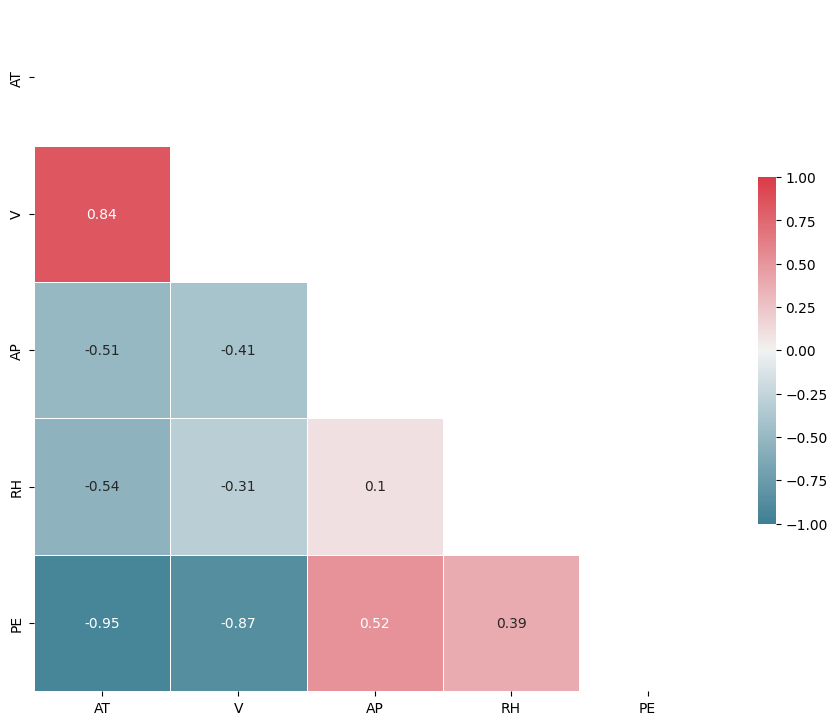

In [7]:

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

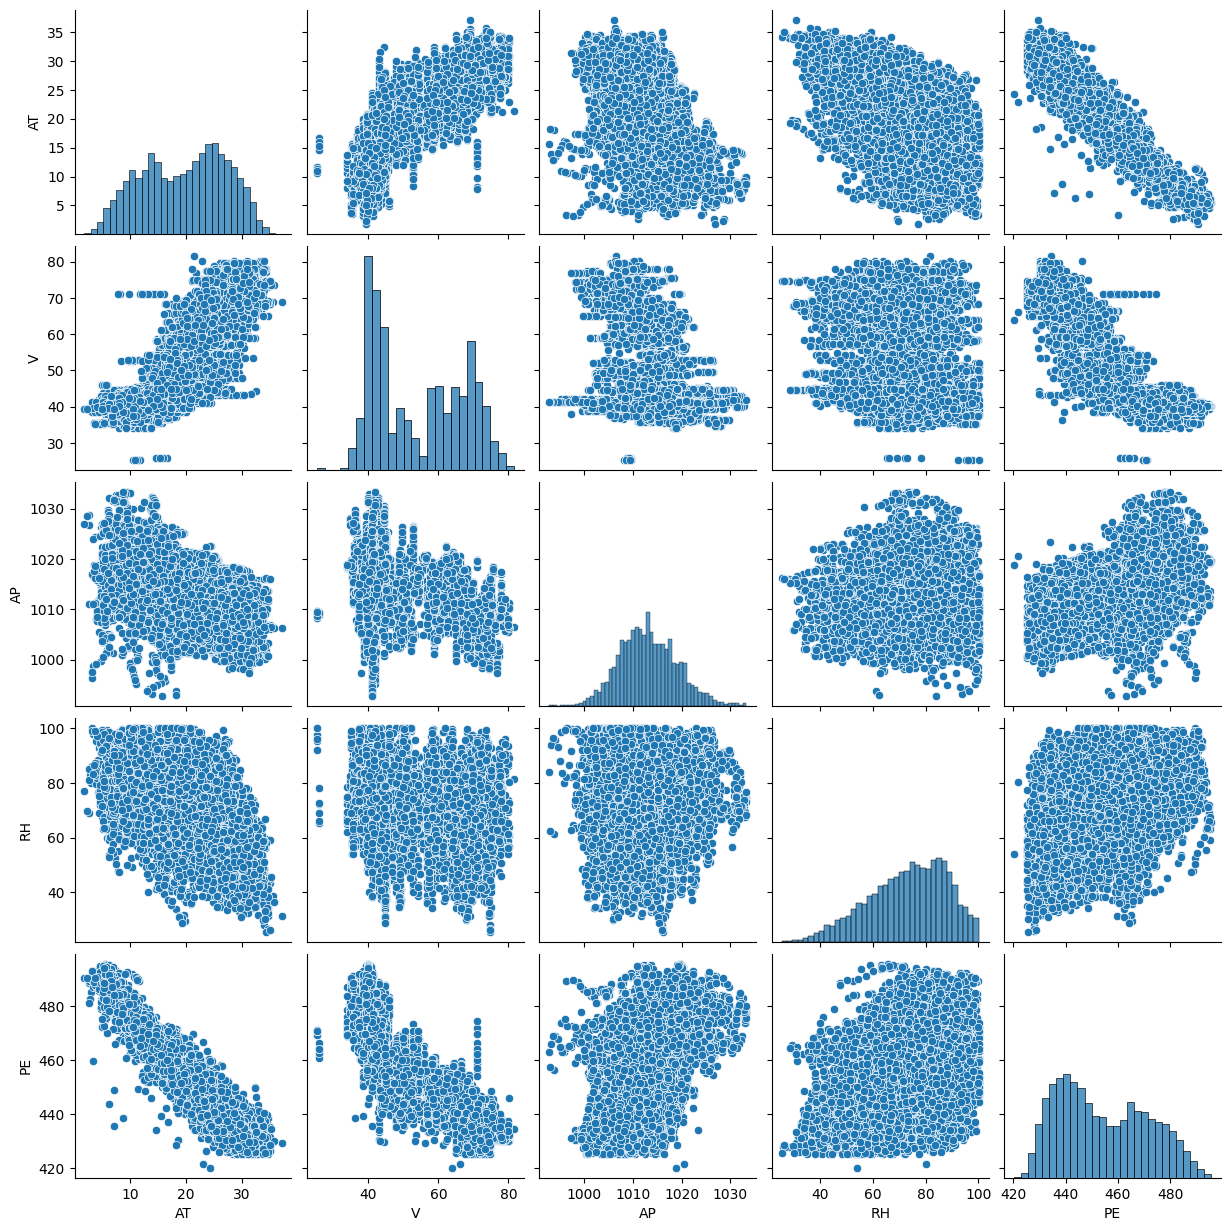

In [8]:
sns.pairplot(df)

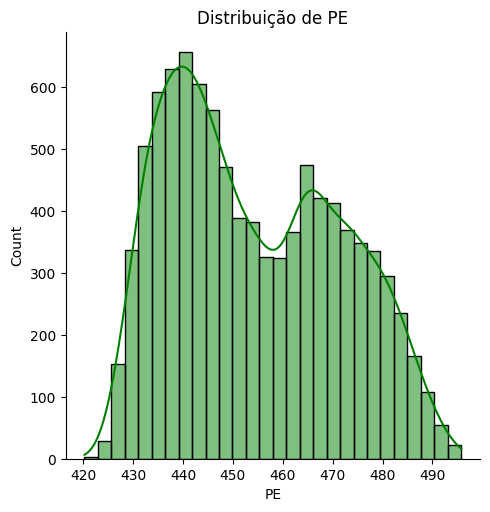

In [10]:

sns.displot(df['PE'], kde=True, color='green')
plt.title('Distribuição de PE')
plt.show()

# 4. Construção dos modelos de regressão linear

In [17]:
coluna_objetivo = 'PE'
colunas = df.columns.to_list()
colunas.remove(coluna_objetivo)
parametros = []
# Definindo y e X
y = df[coluna_objetivo]
X = df.drop(columns = coluna_objetivo)
# Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Adicionando Constante necessária para o modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Dados de treino para comparação
df_train = pd.DataFrame(data= X_train)
df_train[coluna_objetivo] = y_train
# Parametros usados em cada rodada
parametros.append(X_train.columns.to_list())
parametros.append(X_train.columns.drop(colunas[3]).to_list())
parametros.append(X_train.columns.drop(colunas[2]).to_list())
parametros.append(X_train.columns.drop(colunas[1]).to_list())
parametros.append(X_train.columns.drop(colunas[0]).to_list())
parametros.append(X_train.columns.drop([colunas[1],colunas[2]]).to_list())
parametros.append(X_train.columns.drop([colunas[1],colunas[3]]).to_list())
parametros

[['const', 'AT', 'V', 'AP', 'RH'],
 ['const', 'AT', 'V', 'AP'],
 ['const', 'AT', 'V', 'RH'],
 ['const', 'AT', 'AP', 'RH'],
 ['const', 'V', 'AP', 'RH'],
 ['const', 'AT', 'RH'],
 ['const', 'AT', 'AP']]

In [18]:
X_train

,const,AT,V,AP,RH
2794,1.0,11.55,40.60,1014.44,87.06
5990,1.0,25.87,63.47,1011.54,65.45
6771,1.0,23.66,62.08,1022.42,64.13
5409,1.0,14.36,41.26,1021.16,73.43
6959,1.0,32.28,75.33,1002.14,62.49
...,...,...,...,...,...
7382,1.0,13.67,38.53,1009.30,81.85
7763,1.0,15.12,41.04,1025.95,69.67
5218,1.0,7.91,38.56,1016.48,68.94
1346,1.0,19.09,56.51,1015.58,92.56


In [19]:
modelos = []
print("            R²     Qtd de Parametros")
print('==============================================================================================')

for i in range(len(parametros)):
  modelos.append(sm.OLS(y_train, X_train[parametros[i]]).fit())
  print(f' Modelo {i}: {modelos[i].rsquared:.4f} - {len(modelos[i].params)} parametros: {parametros[i]}')
  print('----------------------------------------------------------------------------------------------')


  # print(modelos[i].summary())

            R²     Qtd de Parametros
 Modelo 0: 0.9310 - 5 parametros: ['const', 'AT', 'V', 'AP', 'RH']
----------------------------------------------------------------------------------------------
 Modelo 1: 0.9205 - 4 parametros: ['const', 'AT', 'V', 'AP']
----------------------------------------------------------------------------------------------
 Modelo 2: 0.9308 - 4 parametros: ['const', 'AT', 'V', 'RH']
----------------------------------------------------------------------------------------------
 Modelo 3: 0.9238 - 4 parametros: ['const', 'AT', 'AP', 'RH']
----------------------------------------------------------------------------------------------
 Modelo 4: 0.8049 - 4 parametros: ['const', 'V', 'AP', 'RH']
----------------------------------------------------------------------------------------------
 Modelo 5: 0.9238 - 3 parametros: ['const', 'AT', 'RH']
----------------------------------------------------------------------------------------------
 Modelo 6: 0.9038 - 3 par

Vamos nos ater na análise dos modelos com melhor resultado: 0, 2 e 5

In [20]:
df_train

,const,AT,V,AP,RH,PE
2794,1.0,11.55,40.60,1014.44,87.06,475.14
5990,1.0,25.87,63.47,1011.54,65.45,445.87
6771,1.0,23.66,62.08,1022.42,64.13,447.06
5409,1.0,14.36,41.26,1021.16,73.43,462.25
6959,1.0,32.28,75.33,1002.14,62.49,433.42
...,...,...,...,...,...,...
7382,1.0,13.67,38.53,1009.30,81.85,470.39
7763,1.0,15.12,41.04,1025.95,69.67,460.58
5218,1.0,7.91,38.56,1016.48,68.94,485.95
1346,1.0,19.09,56.51,1015.58,92.56,449.24


# 5. Fator de Inflação da Variância (VIF)

In [38]:
# Calculando o VIF
vif = []

for i, parms in enumerate(parametros):
  vif.append(pd.DataFrame({'variavel': parms,
                              'VIF': [variance_inflation_factor(X_train[parms].values, j) for j in range(X_train[parms].shape[1])]}))
  print(f'## Modelo {i}')
  print(vif[i])
  print('----------------------------------------------------------------------------------------------')

## Modelo 0
  variavel           VIF
0    const  43065.941241
1       AT      6.019200
2        V      3.975126
3       AP      1.443606
4       RH      1.713743
----------------------------------------------------------------------------------------------
## Modelo 1
  variavel           VIF
0    const  39366.205026
1       AT      3.886306
2        V      3.486918
3       AP      1.344774
----------------------------------------------------------------------------------------------
## Modelo 2
  variavel        VIF
0    const  69.006389
1       AT   5.030047
2        V   3.918543
3       RH   1.596417
----------------------------------------------------------------------------------------------
## Modelo 3
  variavel           VIF
0    const  42518.216498
1       AT      1.997986
2       AP      1.423057
3       RH      1.503268
----------------------------------------------------------------------------------------------
## Modelo 4
  variavel           VIF
0    const  35648.545667


Analisando o VIF dos modelos, encontramos os modelos 0 e 2 com VIF > 5, indicando multicolinearidade.
O modelo 1 apresentou um VIF de 3,8 e 3,4 em dois parametros e r² menor que os modelos 3 e 5, por isso vamos utilizar o modelo 5, que apresenta melhores resultados.

# 6. Análise de Residuos e Heterocedasticidade.

In [39]:
# Fazendo um scatter plot entre y_previsto e y_train
# Analise dos residuos de cada modelo

y_previsto_train = []
for i, modelo in enumerate(modelos):
  y_previsto_train.append( modelo.predict(X_train[parametros[i]]))
i=0
fig = px.scatter(x= y_previsto_train[i], y= y_train,
                 title=f'Previsão X Real - Modelo {i}',
                 labels={'x':'PE previsto','y':'PEreal'},
                 trendline='ols', trendline_color_override='red')
fig.show()

In [40]:
i=3
fig = px.scatter(x= y_previsto_train[i], y= y_train,
                 title=f'Previsão X Real - Modelo {i}',
                 labels={'x':'PE previsto','y':'PEreal'},
                 trendline='ols', trendline_color_override='red')
fig.show()

In [26]:
i=5
fig = px.scatter(x= y_previsto_train[i], y= y_train,
                 title=f'Previsão X Real - Modelo {i}',
                 labels={'x':'PE previsto','y':'PEreal'},
                 trendline='ols', trendline_color_override='red')
fig.show()

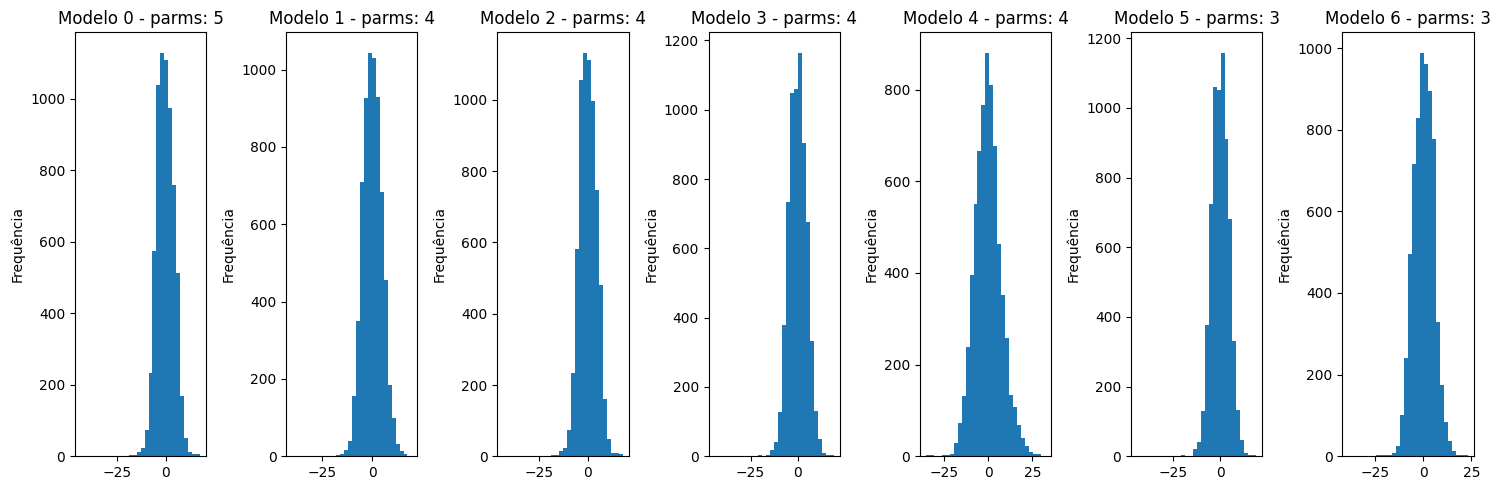

In [41]:
# Analise dos residuos de cada modelo
fig, axs = plt.subplots(1, len(modelos), figsize=(15, 5))

for i, modelo in enumerate(modelos):
  axs[i].hist(modelo.resid, bins=30)
  axs[i].set_title(f'Modelo {i} - parms: {len(parametros[i])}')
  axs[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Resíduos X Previsão - Modelo 0'}, xlabel='PE - Previsão', ylabel='Resíduos'>

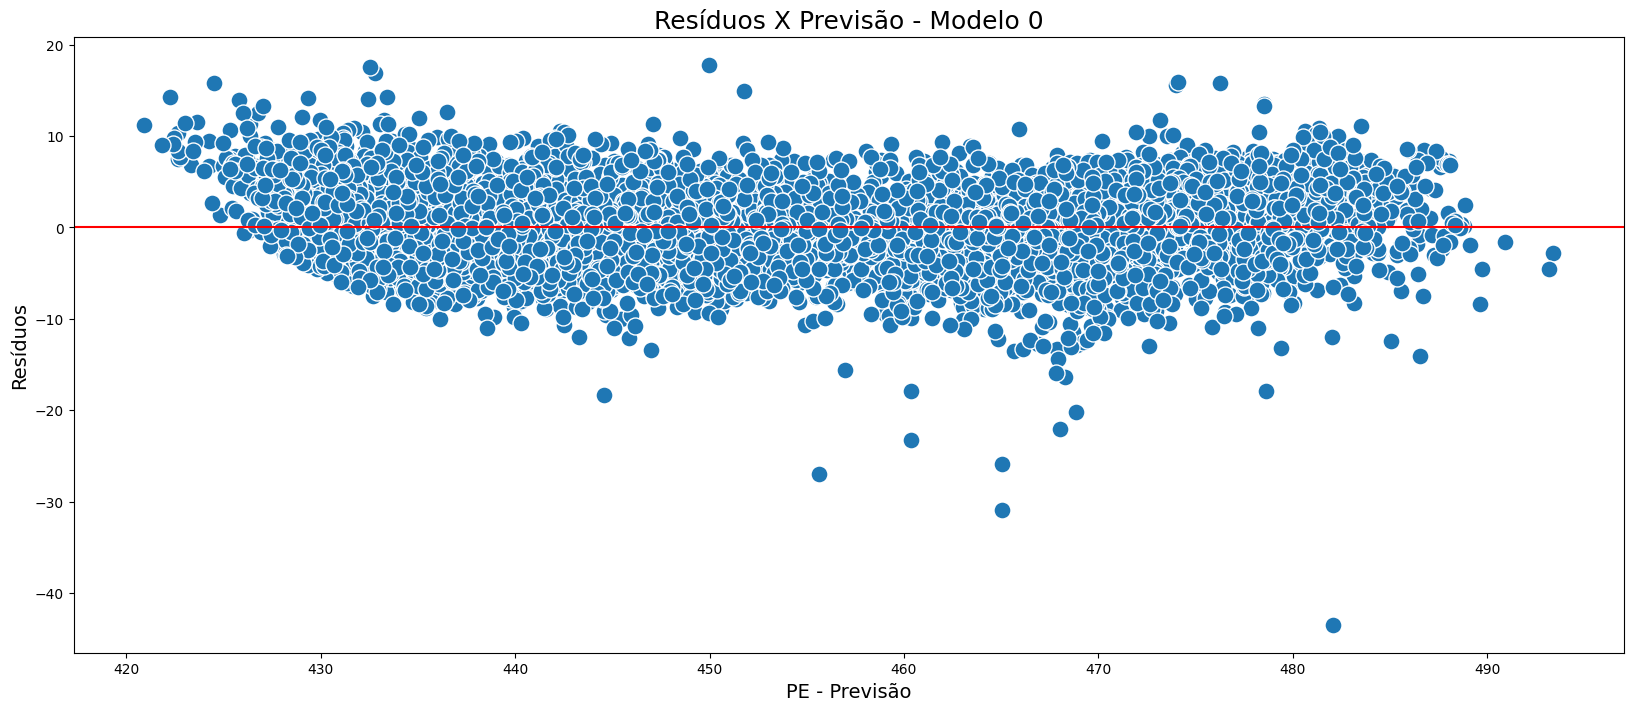

In [30]:
i=0
residuos = modelos[i].resid
ax = sns.scatterplot(x=y_previsto_train[i], y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title(f'Resíduos X Previsão - Modelo {i}', fontsize=18)
ax.set_xlabel('PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax.axhline(y=0, color='red')
ax

<Axes: title={'center': 'Resíduos X Previsão - Modelo 3'}, xlabel='PE - Previsão', ylabel='Resíduos'>

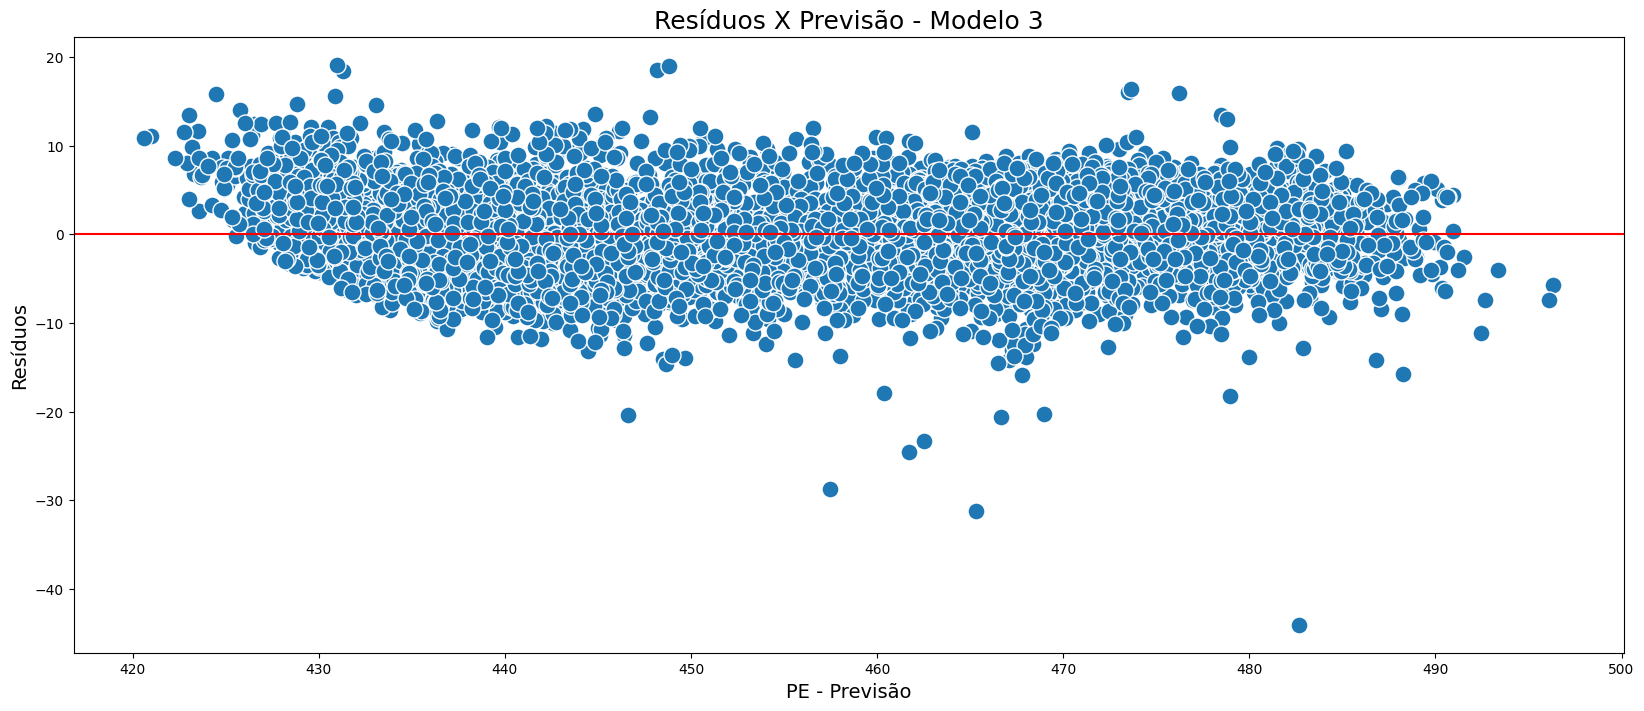

In [42]:
i=3
residuos = modelos[i].resid
ax = sns.scatterplot(x=y_previsto_train[i], y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title(f'Resíduos X Previsão - Modelo {i}', fontsize=18)
ax.set_xlabel('PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax.axhline(y=0, color='red')
ax

<Axes: title={'center': 'Resíduos X Previsão - Modelo 5'}, xlabel='PE - Previsão', ylabel='Resíduos'>

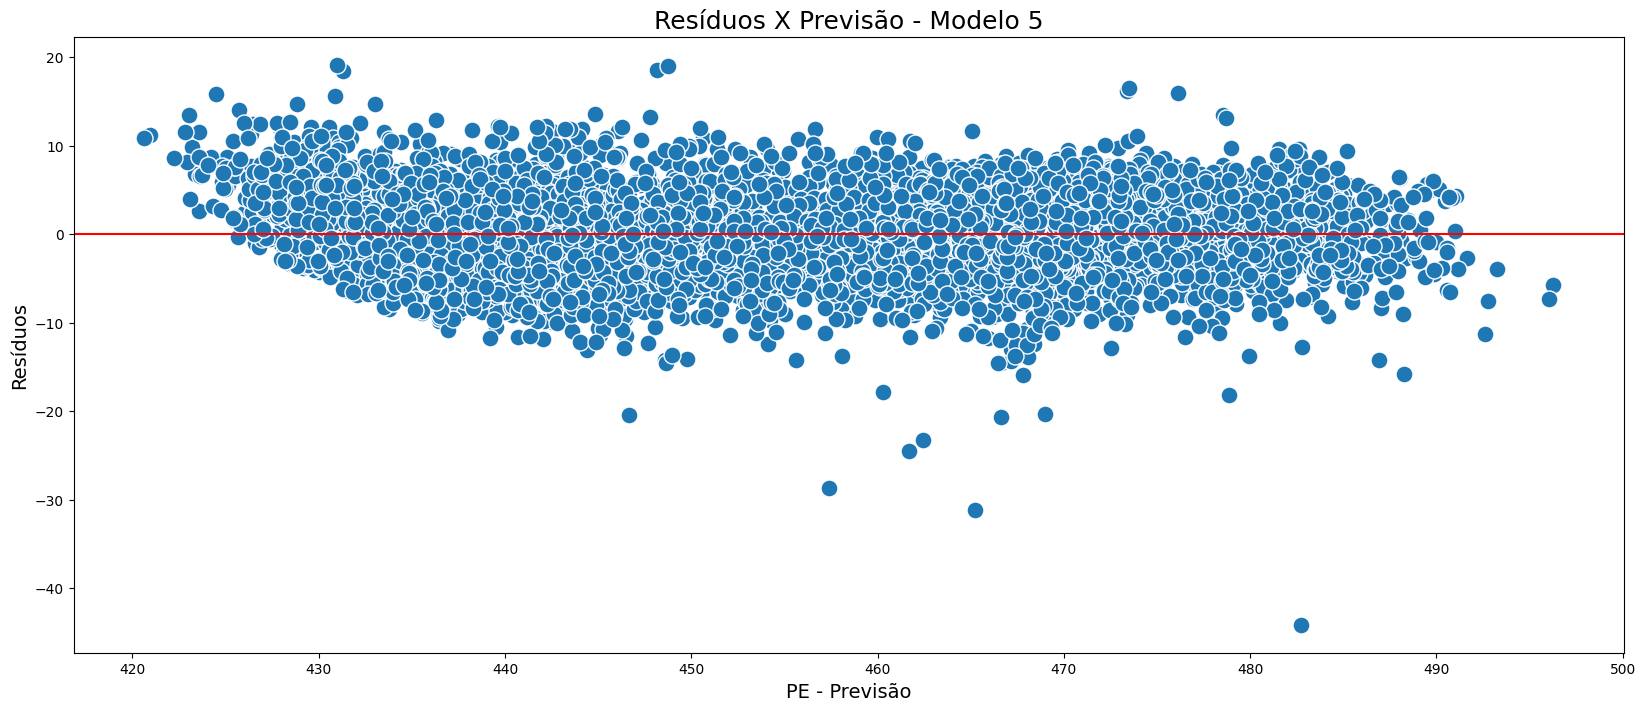

In [32]:
i=5
residuos = modelos[i].resid
ax = sns.scatterplot(x=y_previsto_train[i], y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title(f'Resíduos X Previsão - Modelo {i}', fontsize=18)
ax.set_xlabel('PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax.axhline(y=0, color='red')
ax

O modelo provavelmente apresenta homocedasticidade.

# 7. Comparando R² entre Treino e Teste

In [34]:
# Fazendo as previsões:
y_predict = [] # Initialize y_predict as an empty list

resumo = []

for i, modelo in enumerate(modelos):
  y_predict.append(modelo.predict(X_test[parametros[i]]))
  resumo.append({ 'Modelo' : i,
                  'Sumario': modelo.summary(),
                  'R2-Treino': modelo.rsquared,
                  'R2-Teste': r2_score(y_test, y_predict[i]),
                  'Parametros': parametros[i],
                  })
  print(f' Modelo {i} - R²: {modelo.rsquared:.4f} - {len(modelo.params)} parametros: {parametros[i]}')
  print(f' Teste    - R²: {r2_score(y_test, y_predict[i]):.4f}')
  print('----------------------------------------------------------------------------------------------')

 Modelo 0 - R²: 0.9310 - 5 parametros: ['const', 'AT', 'V', 'AP', 'RH']
 Teste    - R²: 0.9233
----------------------------------------------------------------------------------------------
 Modelo 1 - R²: 0.9205 - 4 parametros: ['const', 'AT', 'V', 'AP']
 Teste    - R²: 0.9121
----------------------------------------------------------------------------------------------
 Modelo 2 - R²: 0.9308 - 4 parametros: ['const', 'AT', 'V', 'RH']
 Teste    - R²: 0.9227
----------------------------------------------------------------------------------------------
 Modelo 3 - R²: 0.9238 - 4 parametros: ['const', 'AT', 'AP', 'RH']
 Teste    - R²: 0.9145
----------------------------------------------------------------------------------------------
 Modelo 4 - R²: 0.8049 - 4 parametros: ['const', 'V', 'AP', 'RH']
 Teste    - R²: 0.8016
----------------------------------------------------------------------------------------------
 Modelo 5 - R²: 0.9238 - 3 parametros: ['const', 'AT', 'RH']
 Teste    - 

In [35]:
resumo

[{'Modelo': 0,
  'Sumario': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                     PE   R-squared:                       0.931
  Model:                            OLS   Adj. R-squared:                  0.931
  Method:                 Least Squares   F-statistic:                 2.258e+04
  Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
  Time:                        15:42:01   Log-Likelihood:                -19529.
  No. Observations:                6697   AIC:                         3.907e+04
  Df Residuals:                    6692   BIC:                         3.910e+04
  Df Model:                           4                                         
  Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
  -----------------------------

In [36]:
r2_data = []
for model in resumo:
    r2_data.append({'Modelo': model['Modelo'], 'R2-Treino': model['R2-Treino'], 'R2-Teste': model['R2-Teste']})

r2_df = pd.DataFrame(r2_data)
r2_df

,Modelo,R2-Treino,R2-Teste
0,0,0.931031,0.923253
1,1,0.920494,0.912099
2,2,0.930839,0.922694
3,3,0.923799,0.914541
4,4,0.804891,0.801559
5,5,0.923785,0.914438
6,6,0.903799,0.893887


<Axes: xlabel='Modelo'>

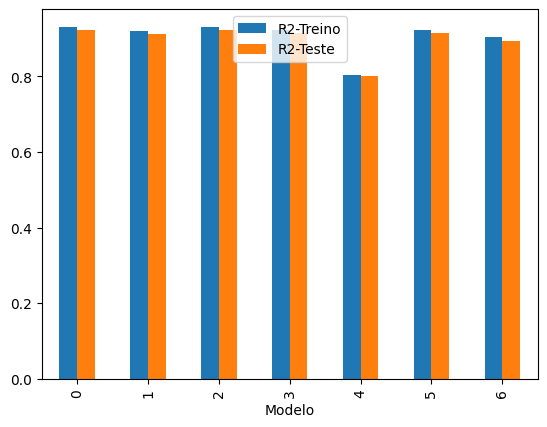

In [37]:
r2_df.plot(x='Modelo', y=['R2-Treino', 'R2-Teste'], kind='bar')

# 8. Conclusões

O melhor modelo é modelo 3, que considera os parametros:  'AT', 'AP', 'RH', com R² de 92%, seguido do modelo 5 que considera apenas os parametros: 'AT', 'RH', com R² de 92%.

Analisando os modelos com melhor resultado, concluimos que ambos apresenta, homocedasticidade.

A recomendação final é usar o modelo 3 com os parametros:  'AT', 'AP', 'RH'.



